<a href="https://colab.research.google.com/github/roronoazoro182/show-recommendation-/blob/main/anime_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MultiLabelBinarizer,MinMaxScaler
from sklearn.cluster import KMeans
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving anime ratings.csv to anime ratings.csv


{'anime ratings.csv': b'anime,studio,seasons,rating,genre,episodes,,\r\nfull metal alchemist,bones,0,9.22,"action,adventure,comedy,super power,drama,fantasy,shounen",64,,\r\none piece,toei,0,8.49,"action,adventure,comedy,super power,drama,fantasy,shounen",945,,\r\nnaruto,studio pierrot,0,8.15,"action,adventure,comedy,super power,drama,fantasy,shounen",500,,\r\nhunterxhunter,madhouse,0,9.12,"action,adventure,comedy,super power,drama,fantasy,shounen",148,,\r\nbleach ,studio pierrot,0,7.8,"action,adventure,comedy,super power,drama,fantasy,shounen",366,,\r\nsket dance,tatsunoko,2,8.26,"slice of life,comedy,school",77,,\r\none punch man,madhouse,2,8.61,"action,comedy,super power,drama,fantasy,shounen",24,,\r\nmob psycho 100,bones,2,8.49,"action,comedy,super power,drama,fantasy,shounen",24,,\r\noregairu,feel,3,8.53,"slice of life,comedy,school,drama",38,,\r\nsteins gate,white fox,2,9.12,"thriller,sci-fi",48,,\r\ncode geass,sunrise,2,8.91,"action,military,sci-fi,super power,drama,school,thril

In [ ]:
anime = pd.read_csv('anime ratings.csv')
anime.head()

,anime,studio,seasons,rating,genre,episodes,Unnamed: 6,Unnamed: 7
0,full metal alchemist,bones,0,9.22,"action,adventure,comedy,super power,drama,fant...",64,NaN,NaN
1,one piece,toei,0,8.49,"action,adventure,comedy,super power,drama,fant...",945,NaN,NaN
2,naruto,studio pierrot,0,8.15,"action,adventure,comedy,super power,drama,fant...",500,NaN,NaN
3,hunterxhunter,madhouse,0,9.12,"action,adventure,comedy,super power,drama,fant...",148,NaN,NaN
4,bleach,studio pierrot,0,7.80,"action,adventure,comedy,super power,drama,fant...",366,NaN,NaN


In [ ]:
anime.shape

(31, 8)

**Preprocessing**

In [ ]:
anime = anime.loc[:,'anime':'episodes']
anime.head()

,anime,studio,seasons,rating,genre,episodes
0,full metal alchemist,bones,0,9.22,"action,adventure,comedy,super power,drama,fant...",64
1,one piece,toei,0,8.49,"action,adventure,comedy,super power,drama,fant...",945
2,naruto,studio pierrot,0,8.15,"action,adventure,comedy,super power,drama,fant...",500
3,hunterxhunter,madhouse,0,9.12,"action,adventure,comedy,super power,drama,fant...",148
4,bleach,studio pierrot,0,7.80,"action,adventure,comedy,super power,drama,fant...",366


In [ ]:
anime.shape

(31, 6)

**One hot encoding the genre column**

In [ ]:
genre_split = anime['genre'].str.split(',')
genre_split[13]

['space', 'sci-fi', 'military', 'drama']

In [ ]:
multi = MultiLabelBinarizer()
genre_onehot = multi.fit_transform(genre_split)
genre_onehot

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
genre_class = multi.classes_

In [ ]:
genre_split_df = pd.DataFrame(genre_onehot,columns=genre_class)
genre_split_df.head()

,action,adventure,comedy,drama,fantasy,historical,mecha,military,mystery,school,sci-fi,shounen,slice of life,space,sports,super power,thriller
0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0
4,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0


One hot encoding studio column

In [ ]:
studio_class = list(anime['studio'].unique())
studio_class

['bones',
 'toei',
 'studio pierrot',
 'madhouse',
 'tatsunoko',
 'feel',
 'white fox',
 'sunrise',
 'studio deen',
 'artland',
 'kyoto animation',
 'production I.G',
 '8bit',
 'A1 pictures',
 'wit studio',
 'manglobe',
 'Mappa',
 'ufotable']

In [ ]:
studio_onehot = pd.get_dummies(anime['studio'],columns=studio_class)
studio_onehot.head()

,8bit,A1 pictures,Mappa,artland,bones,feel,kyoto animation,madhouse,manglobe,production I.G,studio deen,studio pierrot,sunrise,tatsunoko,toei,ufotable,white fox,wit studio
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**combining the original df with the one hot encoded genres**

In [ ]:
anime1 = anime
anime1 = anime1.drop(columns=['genre','studio','anime'])
scale = MinMaxScaler()
anime_scaled = scale.fit_transform(anime1)
anime_scaled

array([[0.        , 1.        , 0.05573419],
       [0.        , 0.62944162, 1.        ],
       [0.        , 0.45685279, 0.52304394],
       [0.        , 0.94923858, 0.14576635],
       [0.        , 0.27918782, 0.37942122],
       [0.5       , 0.51269036, 0.06966774],
       [0.5       , 0.69035533, 0.01286174],
       [0.5       , 0.62944162, 0.01286174],
       [0.75      , 0.64974619, 0.0278671 ],
       [0.5       , 0.94923858, 0.03858521],
       [0.5       , 0.84263959, 0.04072883],
       [0.5       , 0.46192893, 0.00857449],
       [0.25      , 0.78172589, 0.01500536],
       [0.        , 0.93908629, 0.10503751],
       [0.25      , 0.69543147, 0.02679528],
       [0.75      , 0.26903553, 0.02572347],
       [0.25      , 0.45685279, 0.01071811],
       [0.75      , 0.84263959, 0.0664523 ],
       [0.5       , 0.47715736, 0.04072883],
       [0.25      , 0.4213198 , 0.01286174],
       [0.5       , 0.79187817, 0.01178992],
       [0.75      , 0.60913706, 0.05037513],
       [0.

In [ ]:
anime_scaled = pd.DataFrame(anime_scaled,columns=['seasons','ratings','episodes'])
anime_scaled.head()

,seasons,ratings,episodes
0,0.0,1.000000,0.055734
1,0.0,0.629442,1.000000
2,0.0,0.456853,0.523044
3,0.0,0.949239,0.145766
4,0.0,0.279188,0.379421


In [ ]:
anime_final1= pd.concat([anime_scaled,genre_split_df,studio_onehot],axis=1)
print(anime_final1.shape)
anime_final1.head()


(31, 38)


,seasons,ratings,episodes,action,adventure,comedy,drama,fantasy,historical,mecha,military,mystery,school,sci-fi,shounen,slice of life,space,sports,super power,thriller,8bit,A1 pictures,Mappa,artland,bones,feel,kyoto animation,madhouse,manglobe,production I.G,studio deen,studio pierrot,sunrise,tatsunoko,toei,ufotable,white fox,wit studio
0,0.0,1.000000,0.055734,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.629442,1.000000,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,0.456853,0.523044,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.0,0.949239,0.145766,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.279188,0.379421,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
anime_final1.set_index(anime['anime'],inplace=True)
anime_final1.head()

,seasons,ratings,episodes,action,adventure,comedy,drama,fantasy,historical,mecha,military,mystery,school,sci-fi,shounen,slice of life,space,sports,super power,thriller,8bit,A1 pictures,Mappa,artland,bones,feel,kyoto animation,madhouse,manglobe,production I.G,studio deen,studio pierrot,sunrise,tatsunoko,toei,ufotable,white fox,wit studio
anime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
full metal alchemist,0.0,1.000000,0.055734,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
one piece,0.0,0.629442,1.000000,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
naruto,0.0,0.456853,0.523044,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
hunterxhunter,0.0,0.949239,0.145766,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
bleach,0.0,0.279188,0.379421,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
anime_final1.shape

(31, 38)

**Finding optimum no of clusters**

In [ ]:
cat_list = [i for i in range(2,38)]

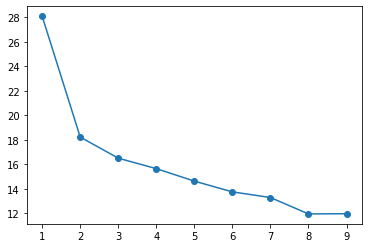

In [ ]:
ks = range(1, 10)
inertias = []
for k in ks:
    kp = KPrototypes(n_clusters=k, random_state=8)
    kp.fit(anime_final1,categorical=cat_list)
    inertias.append(kp.cost_)
    
plt.plot(ks,inertias, marker='o')

**PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(3)
pca.fit(anime_final1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
var = pca.explained_variance_ # storing the variance in variable named var
var_sum = [] # creating empty list 

for i in var:
  var_sum.append((i/var.sum())*100)

In [ ]:
np.sum(var_sum[:18])

99.99999999999999

In [ ]:
anime_pca = pca.fit_transform(anime_final1)

Building KPrototype model using 3 clusters

In [ ]:
model = KPrototypes(n_clusters=3,max_iter=20,random_state=8)
clusters = model.fit_predict(anime_final1,categorical=cat_list)

In [ ]:
len(clusters)

31

In [ ]:
anime_final1['clusters'] = clusters
anime_final1.head()

,seasons,ratings,episodes,action,adventure,comedy,drama,fantasy,historical,mecha,military,mystery,school,sci-fi,shounen,slice of life,space,sports,super power,thriller,8bit,A1 pictures,Mappa,artland,bones,feel,kyoto animation,madhouse,manglobe,production I.G,studio deen,studio pierrot,sunrise,tatsunoko,toei,ufotable,white fox,wit studio,clusters
anime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
full metal alchemist,0.0,1.000000,0.055734,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
one piece,0.0,0.629442,1.000000,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
naruto,0.0,0.456853,0.523044,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
hunterxhunter,0.0,0.949239,0.145766,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
bleach,0.0,0.279188,0.379421,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Plotting the clusters**

In [ ]:
anime_pca.shape

(31, 3)

In [ ]:
pca1 = anime_pca[:,0]
pca2 = anime_pca[:,1]
pca3 = anime_pca[:,2]

In [ ]:
import seaborn as sns

In [ ]:
x_range = [i for i in range(31)]
y_range = anime_final1['clusters']
sns.scatterplot(pca1,pca2,pca3,hue=y_range,palette='viridis')
plt.show()

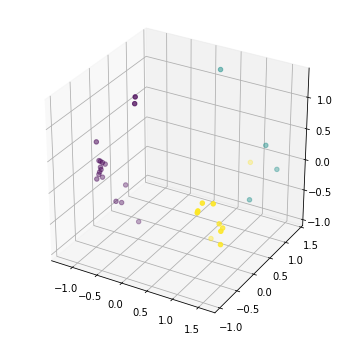

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca1,pca2,pca3,c=y_range)
plt.show()

**Recommending anime based on user input**

In [ ]:
title = input('Enter the name of the anime you like:\n')

Enter the name of the anime you like:
oregairu


In [ ]:
clus = anime_final1.loc[title,'clusters']
rec = anime_final1[anime_final1['clusters']==clus]
rec

,seasons,ratings,episodes,action,adventure,comedy,drama,fantasy,historical,mecha,military,mystery,school,sci-fi,shounen,slice of life,space,sports,super power,thriller,8bit,A1 pictures,Mappa,artland,bones,feel,kyoto animation,madhouse,manglobe,production I.G,studio deen,studio pierrot,sunrise,tatsunoko,toei,ufotable,white fox,wit studio,clusters
anime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sket dance,0.50,0.512690,0.069668,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
oregairu,0.75,0.649746,0.027867,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
code geass,0.50,0.842640,0.040729,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
hyouka,0.25,0.456853,0.010718,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
haikyuu,0.75,0.842640,0.066452,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
kuroko no basket,0.50,0.477157,0.040729,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
kaguya sama love is war,0.50,0.791878,0.011790,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
tokyo ghoul,1.00,0.289340,0.040729,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
your lie in april,0.25,0.776650,0.010718,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
recommend = [i for i in rec.index]
print('Here are some anime you may like\n')
for i in range(len(recommend)):
  print(str(i)+':'+recommend[i])

Here are some anime you may like

0:sket dance
1:oregairu
2:code geass
3:hyouka
4:haikyuu
5:kuroko no basket
6:kaguya sama love is war
7:tokyo ghoul
8:your lie in april
9:violet evergarden
